In [181]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np

from utils import metrics
from utils import SaveModel
from utils import inference
from utils import VizAttention
from data.LoadData import String2Int, load_meta

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
device = torch.device("cpu" if torch.cuda.is_available() else "cpu")

In [35]:
train_meta = load_meta('./data/metadata/train_meta.json')
train_paths = ['./data'+path for path in train_meta['paths']]

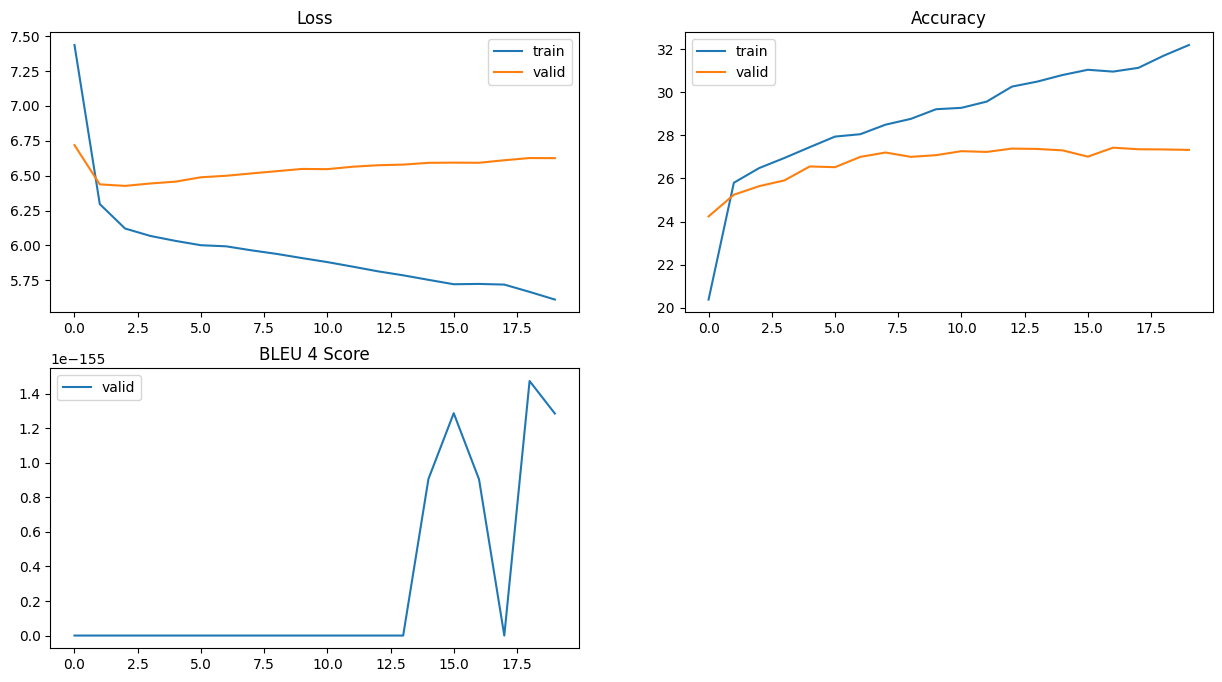

In [3]:
losses = metrics.LoadMetricLog("./logs/losses.txt")
val_losses = metrics.LoadMetricLog("./logs/val_losses.txt")
top5acc = metrics.LoadMetricLog("./logs/top5acc.txt")
val_top5acc = metrics.LoadMetricLog("./logs/val_top5acc.txt")
bleu4 = metrics.LoadMetricLog("./logs/bleu4.txt")

plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.title("Loss")
plt.plot(losses, label="train")
plt.plot(val_losses, label="valid")
plt.legend()

plt.subplot(222)
plt.title("Accuracy")
plt.plot(top5acc, label="train")
plt.plot(val_top5acc, label="valid")
plt.legend()

plt.subplot(223)
plt.title("BLEU 4 Score")
plt.plot(bleu4, label="valid")
plt.legend()

plt.show()

In [11]:
# import model
checkpoint = torch.load("./checkpoints/best_mod.pth.tar", map_location=torch.device('cpu'))
epoch = checkpoint['epoch']
encoder = checkpoint['encoder']
decoder = checkpoint['decoder']
encoder_optimizer = checkpoint['encoder_optimizer']
decoder_optimizer = checkpoint['decoder_optimizer']
score = checkpoint['score']
config = checkpoint['config']

string2int = String2Int(saved_dict=config['string2int'])

In [24]:
encoder = encoder.to(device)
encoder.device = device
decoder = decoder.to(device)

In [218]:
imn = 10
image = inference.load_prep_image(train_paths[imn], transforms=encoder.transforms).to(decoder.device)
image_notransform = inference.load_prep_image(train_paths[imn], transforms=None)

In [219]:
caption, final_seq, bleu4, final_alpha = inference.beam_caption(image, encoder, decoder, string2int, beam_size=3)

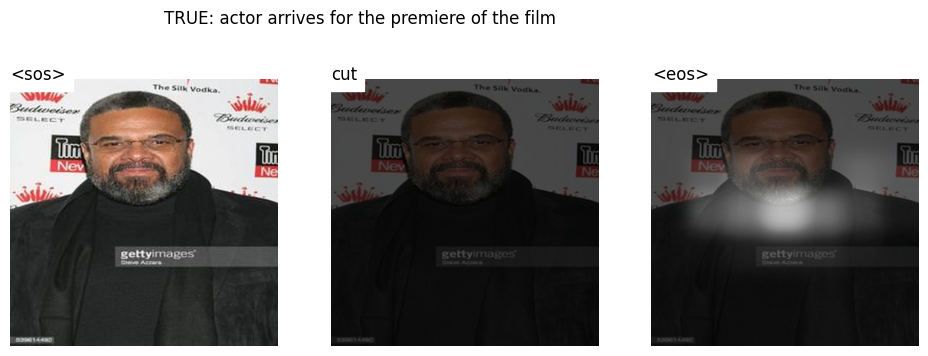

In [220]:
plt.figure(figsize=(20, 15))
VizAttention.plot_predicted(image_notransform, final_seq, final_alpha, string2int)
plt.suptitle("TRUE: "+train_meta['labels'][imn], x=0.3, y=0.63)
plt.show()